# Sensitivity Analysis (SA) with VARS and G-VARS:
## Correlated/Uncorrelated and Uniformly/Non-uniformly Distributed Inputs

Notebook developed by Saman Razavi, Cordell Blanchard, and Kasra Keshavarz


### For the VARS method, please cite:

Razavi, S., & Gupta, H. V. (2016). A new framework for comprehensive, robust, and efficient global sensitivity analysis: 1. Theory. Water Resources Research, 52(1), 423-439. https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2015WR017558

Razavi, S., & Gupta, H. V. (2016). A new framework for comprehensive, robust, and efficient global sensitivity analysis: 2. Application. Water Resources Research, 52(1), 440-455. https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1002/2015WR017559

### For the Generalized VARS (G-VARS) method, please cite:

Do, N. C., & Razavi, S. (2020). Correlation effects? A major but often neglected component in sensitivity and uncertainty analysis. Water Resources Research, 56(3), e2019WR025436. https://doi.org/10.1029/2019WR025436

## Exercise 1: From A to Z on the Ishigami test function
### Objectives:
Experiment 1 | First, let's run SA on Ishigami via *VARS* when the inputs are uncorrelated and uniformly distributed - this is the classic setting in the literature and the objective is to set a benchmark for the rest of this exercise.

Experiment 2 | Now, switch to *G-VARS* but keep the inputs uncorrelated and uniformly distributed - this module is essentially the same as the previous module but with a more generalized method, with the objective of testing if G-VARS can re-produce VARS results.

Experiment 3 | Run *G-VARS* when the inputs are correlated but still uniformly distributed - the objective of this module is to assess the role of correlation between inputs on the SA results.

Experiment 4 | Finally, run the previous experiment now with both correlated and non-uniformly distributed inputs - the objective of this module is to see what happens when the inputs follow other distributions such as normal or triangular distribution.

First import the needed librares, including `VARS` for VARS, `GVARS` for G-VARS and the `Model` class for creating a wrapper around the desired model.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import stats

from varstool import VARS, GVARS, Model

### Introduce the Ishigami function for sensitivity analysis

The Ishigami function is a function with three inputs. It is one of the most commonly used functions in the SA literature to test and compare the performance of different SA methods.

In [8]:
def ishigami(x, a=7, b=0.1):
    '''Ishigami test function'''
    # check whether the input x is a dataframe
    
    if not isinstance(x, (pd.core.frame.DataFrame, pd.core.series.Series, np.ndarray, list)):
        raise TypeError('`x` must be of type pandas.DataFrame, numpy.ndarray, pd.Series, or list')
    
    if len(x) > 3:
        raise ValueError('`x` must have only three arguments at a time')
    
    return np.sin(x[0]) + a*(np.sin(x[1])**2) + b*(x[2]**4)*np.sin(x[0])

Wrap the function of interest with the `Model` class.

In [9]:
ishigami_model = Model(ishigami)

Let's run the wrapped function for an arbitrary input and check the output.

In [10]:
x=pd.Series({#name  #value
             'x1'   : 0 ,
             'x2'   : 0 ,
             'x3'   : 0 ,
             })
ishigami_model(x)

0.0

### Set up the four SA experiments

***
<p><center>Table 1. The attributes of the STAR-VARS algorithm </center></p>

| Attribute      | Description |
| :-------------:|:----------- |
|`paramaters`    | The name of every paramter along with its upper and lower bounds           |
|`num_stars`     | The total number of stars centers for VARS analysis                        |
|`delta_h`       | The sampling resolution of the STAR-VARS sampling to generate star points  |
|`ivars_scales`  | The scales of interest for IVARS estimation, e.g, 0.1 and 0.5 correspond (0-0.1) and (0-0.5) <br /> note: can not have a scale larger than 0.5|
|`star_centres`  | User-generated star centers - only used when a sampler is not chosen       |
|`sampler`       | The sampling strategy: `rnd`, `lhs`, `plhs`, `sobol_seq`, or `halton_seq` for generation of star centers|
|`slice_size`       | The slice size used when `plhs` sampling method is chosen|
|`seed`          | The seed number for randomization of the sampling strategy specified by `sampler`, <br /> only needed if a sampler was chosen  |
|`model`         | The wrapper of your model in the `Model` class|
|`bootstrap_flag`| This is a `True`/`False` value to turn on/off bootstrapping of VARS results   |
|`bootstrap_size`| The number of sampling iterations with replacement via bootstrapping |
|`bootstrap_ci`  | The level of confidence used in bootstrap reporting         |
|`grouping_flag` | This is a `True`/`False` value to turn on/off grouping of VARS results   |
|`num_grps`      | The number of groups you want to split your model paramaters into, <br /> if left blank the optimal number of groups will be calculated by VARS|
|`report_verbose`| this is a `True`/`False` value that if `True` will display a loading bar <br /> to show the progession of the VARS analysis, else there will be no progression loading bar|


***
<p><center>Table 2. The attributes that GVARS inherits from VARS </center></p>

| Attribute      | Description |
| :-------------:|:----------- |
|`num_stars`     | The total number of stars centers for VARS analysis                        |
|`ivars_scales`  | The scales of interest for IVARS estimation, e.g, 0.1 and 0.5 correspond (0-0.1) and (0-0.5) <br /> note: can not have a scale larger than 0.5|
|`star_centres`  | User-generated star centers - only used when a sampler is not chosen       |
|`sampler`       | The sampling strategy: `rnd`, `lhs`, `plhs`, `sobol_seq`, or `halton_seq` for generation of star centers|
|`seed`          | The seed number for randomization of the sampling strategy specified by `sampler`, <br /> only needed if a sampler was chosen  |
|`model`         | The wrapper of your model in the `Model` class|
|`bootstrap_flag`| This is a `True`/`False` value to turn on/off bootstrapping of VARS results   |
|`bootstrap_size`| The number of sampling iterations with replacement via bootstrapping |
|`bootstrap_ci`  | The level of confidence used in bootstrap reporting         |
|`grouping_flag` | This is a `True`/`False` value to turn on/off grouping of VARS results   |
|`num_grps`      | The number of groups you want to split your model paramaters into, <br /> if left blank the optimal number of groups will be calculated by VARS|
|`report_verbose`| this is a `True`/`False` value that if `True` will display a loading bar <br /> to show the progession of the VARS analysis, else there will be no progression loading bar|

***
In addition, GVARS has three unique attributes: `parameters`, `corr_mat`, and `num_dir_samples`, as explained in the following.

`parameters` includes the name of every model parameter, the distribution it follows, and the parameters specifying that distribution. The distributions currently available and their parameters are listed in Table 2.

<p><center>Table 2. The parameter distributions currently supported in GVARS </center></p>

| Distribution type        | Distribution parameter 1 | Distribution parameter 2 | Distribution parameter 3 | Distribution identifier |
| :-----------------------:|:-----------------------: |:-----------------------: |:-----------------------: |:----------: |
|uniform                   | lower bound              | upper bound              | None                     |  `unif`     |
|triangle                  | lower bound              | upper bound              | mode                     |  `triangle` |
|normal                    | mean                     | standard deviation       | None                     |  `norm`     |
|lognormal                 | mean                     | standard deviation       | None                     |  `lognorm`  |
|exponential               | mean                     | standard deviation       | None                     |  `expo`     |
|generalized extreme value | location                 | scale                    | shape                    |  `gev`      |


`corr_mat` is the correlation matrix which includes the Pearson correlation between every pair of parameters and must be defined as a numpy array.


`num_dir_samples` is the number of samples GVARS takes along each direction for every star center. 
***
**A "good-to-know" peice for advanced users:**

In GVARS, the star-based sampling is modified to work with `num_stars` and `num_dir_samples`. This is unlike VARS where the star-based sampling works with `num_stars` and `delta_h`.

GVARS still needs `delta_h` as an attribute for estimating and reporting directional variograms (not for sampling). As a rule-of-thumb, the user may set `delta_h` to be the reciprocal of `num_dir_samples`. For example, if num_dir_samples = 10, we suggest delta_h = 0.1.

An advanced user may try other values of `delta_h` to extract more accurate results. In general, the smaller the `delta_h`, the more granular the results. But, the tradeoff with smaller values would be to have fewer pairs in the bins when estimating variograms.


In [11]:
# Define Experiment 1

my_parameters = { 'x1': [ -3.14, 3.14 ], 
                  'x2': [ -3.14, 3.14 ], 
                  'x3': [ -3.14, 3.14 ], }

experiment_1 = VARS(parameters     = my_parameters,
                    num_stars      = 100,
                    delta_h        = 0.1,
                    ivars_scales   = (0.1, 0.3, 0.5),
                    sampler        = 'lhs',
                    seed           = 123456789,
                    model          = ishigami_model,
                    bootstrap_flag = True,
                    bootstrap_size = 100,
                    bootstrap_ci   = 0.9,
                    grouping_flag  = True,
                    num_grps       = 2,
                    report_verbose = True,
                    )

In [12]:
# Define Experiment 2

my_parameters = { 'x1': (-3.14, 3.14, None, 'unif'), 
                  'x2': (-3.14, 3.14, None, 'unif'), 
                  'x3': (-3.14, 3.14, None, 'unif')}

my_corr_mat = np.array([[ 1   ,  0 ,  0   ],
                        [ 0   ,  1 ,  0   ],
                        [ 0   ,  0 ,  1   ]])

my_num_dir_samples = 10

my_delta_h = 0.1
# my_delta_h = 1 / my_num_dir_samples # or choose values such as 0.1

experiment_2 = GVARS(parameters     = my_parameters,
                    corr_mat        = my_corr_mat,
                    num_stars       = 100,
                    num_dir_samples = my_num_dir_samples,
                    delta_h         = my_delta_h,
                    ivars_scales    = (0.1, 0.3, 0.5),
                    sampler         = 'plhs',
                    slice_size      = 10,
                    model           = ishigami_model,
                    seed            = 123456789,
                    bootstrap_flag  = True,
                    bootstrap_size  = 100,
                    bootstrap_ci    = 0.9,
                    grouping_flag   = False,
                    num_grps        = 2,
                    report_verbose  = True,
                    )

In [7]:
# Define Experiment 3

my_parameters = { 'x1': (-3.14, 3.14, None, 'unif'), 
                  'x2': (-3.14, 3.14, None, 'unif'), 
                  'x3': (-3.14, 3.14, None, 'unif')}

my_corr_mat = np.array([[ 1   ,  0 ,  0.8 ],
                        [ 0   ,  1 ,  0   ],
                        [ 0.8 ,  0 ,  1   ]])

my_num_dir_samples = 10

my_delta_h = 0.1
# my_delta_h = 1 / my_num_dir_samples # or choose values such as 0.1

experiment_3 = GVARS(parameters     = my_parameters,
                    corr_mat        = my_corr_mat,
                    num_stars       = 100,
                    num_dir_samples = my_num_dir_samples,
                    delta_h         = my_delta_h,
                    ivars_scales    = (0.1, 0.3, 0.5),
                    sampler         = 'plhs',
                    slice_size      = 10,
                    model           = ishigami_model,
                    seed            = 123456789,
                    bootstrap_flag  = True,
                    bootstrap_size  = 100,
                    bootstrap_ci    = 0.9,
                    grouping_flag   = True,
                    num_grps        = 2,
                    report_verbose  = True,
                    )

In [8]:
# Define Experiment 4

my_parameters = { 'x1': (-3.14, 3.14,  None, 'unif'    ), 
                  'x2': (  0  ,  1  ,  None, 'norm'    ), 
                  'x3': (-3.14, 3.14, -3.14, 'triangle')}

my_corr_mat = np.array([[ 1   ,  0 ,  0.8 ],
                        [ 0   ,  1 ,  0   ],
                        [ 0.8 ,  0 ,  1   ]])

my_num_dir_samples = 10

my_delta_h = 0.1
# my_delta_h = 1 / my_num_dir_samples # or choose values such as 0.1

experiment_4 = GVARS(parameters     = my_parameters,
                    corr_mat        = my_corr_mat,
                    num_stars       = 100,
                    num_dir_samples = my_num_dir_samples,
                    delta_h         = my_delta_h,
                    ivars_scales    = (0.1, 0.3, 0.5),
                    sampler         = 'plhs',
                    slice_size      = 10,
                    model           = ishigami_model,
                    seed            = 123456789,
                    bootstrap_flag  = True,
                    bootstrap_size  = 100,
                    bootstrap_ci    = 0.9,
                    grouping_flag   = True,
                    num_grps        = 2,
                    report_verbose  = True,
                    )

### Run the SA experiments

Now, run the four experiments defined above.

In [13]:
experiment_1.run_online()


model evaluation:   0%|          | 0/2800 [00:00<?, ?it/s]

building pairs:   0%|          | 0/300 [00:00<?, ?it/s]

VARS analysis:   0%|          | 0/10 [00:00<?, ?it/s]

factor ranking:   0%|          | 0/2 [00:00<?, ?it/s]

bootstrapping and grouping:   0%|          | 0/100 [00:00<?, ?it/s]

In [10]:
experiment_2.run_online()

building fictive matrix:   0%|                                                                   | 0/2 [00:00<…

generating star points
:   0%|                                                                   | 0/8 [00:00<…

model evaluation:   0%|                                                                       | 0/3000 [00:00<…

building pairs:   0%|                                                                          | 0/300 [00:00<…

calculating 'h' values:   0%|          | 0/100 [00:00<?, ?it/s]

binning and reording pairs based on 'h' values:   0%|          | 0/100 [00:00<?, ?it/s]

VARS analysis:   0%|                                                                            | 0/10 [00:00<…

factor ranking:   0%|                                                                            | 0/2 [00:00<…

bootstrapping:   0%|                                                                           | 0/100 [00:00<…

In [11]:
experiment_3.run_online()

building fictive matrix:   0%|                                                                   | 0/2 [00:00<…

generating star points
:   0%|                                                                   | 0/8 [00:00<…

model evaluation:   0%|                                                                       | 0/3000 [00:00<…

building pairs:   0%|                                                                          | 0/300 [00:00<…

calculating 'h' values:   0%|          | 0/100 [00:00<?, ?it/s]

binning and reording pairs based on 'h' values:   0%|          | 0/100 [00:00<?, ?it/s]

VARS analysis:   0%|                                                                            | 0/10 [00:00<…

factor ranking:   0%|                                                                            | 0/2 [00:00<…

bootstrapping and grouping:   0%|                                                              | 0/100 [00:00<…

In [12]:
experiment_4.run_online()

building fictive matrix:   0%|                                                                   | 0/2 [00:00<…

generating star points
:   0%|                                                                   | 0/8 [00:00<…

model evaluation:   0%|                                                                       | 0/3000 [00:00<…

building pairs:   0%|                                                                          | 0/300 [00:00<…

calculating 'h' values:   0%|          | 0/100 [00:00<?, ?it/s]

binning and reording pairs based on 'h' values:   0%|          | 0/100 [00:00<?, ?it/s]

VARS analysis:   0%|                                                                            | 0/10 [00:00<…

C:\Users\ser134\Anaconda3\lib\site-packages\varstool\varstool.py:1461: UserWarning: For some or all variables there are no results for the directional variogram for the following h values: 0.8, you may want to consider increasing the sample size.

  warnings.warn(warning_string,


factor ranking:   0%|                                                                            | 0/2 [00:00<…

bootstrapping and grouping:   0%|                                                              | 0/100 [00:00<…

### Check out the results

Let's check out the results of the four SA experiments, including IVARS, VARS-TO, VARS-ABE, VARS-ACE, and directional variograms.

**IVARS: Integrated variogram Across a Range of Scales** 

IVARS indices are the primary sensitivity indices by the VARS approach. First, print all the IVARS indices for the scale ranges of interest.

In [13]:
# IVARS from Experiment 1
cols = experiment_1.parameters.keys()
experiment_1.ivars[cols]

,x1,x2,x3
0.1,0.066097,0.229198,0.059902
0.3,0.961455,2.147283,0.574615
0.5,3.313248,3.035793,1.461225


In [14]:
# IVARS from Experiment 2
cols = experiment_2.parameters.keys()
experiment_2.ivars[cols]

,x1,x2,x3
0.1,0.053852,0.234677,0.055430
0.3,0.959110,2.137576,0.499354
0.5,3.543999,3.066681,1.291384


In [15]:
# IVARS from Experiment 3
cols = experiment_3.parameters.keys()
experiment_3.ivars[cols]

,x1,x2,x3
0.1,0.068237,0.234677,0.051975
0.3,0.514740,2.137576,0.506687
0.5,0.973749,3.066681,1.235015


In [16]:
# IVARS from Experiment 4
cols = experiment_4.parameters.keys()
experiment_4.ivars[cols]

,x1,x2,x3
0.1,0.057655,0.182248,0.064483
0.3,0.499727,1.941666,0.489610
0.5,1.451779,3.110431,0.997835


 Choose a scale range and plot the respective IVARS indices. Two points:
 
    POINT1: IVARS-50 (h=[0-0.5]), called ***Total-Variogram Effect*** is the most comprehensive sensitivity index.
    POINT2: Plotting sensitivity results in log scale helps us better differentiate less influential parameters.

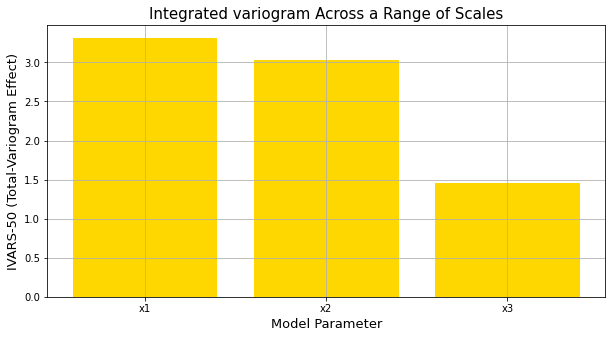

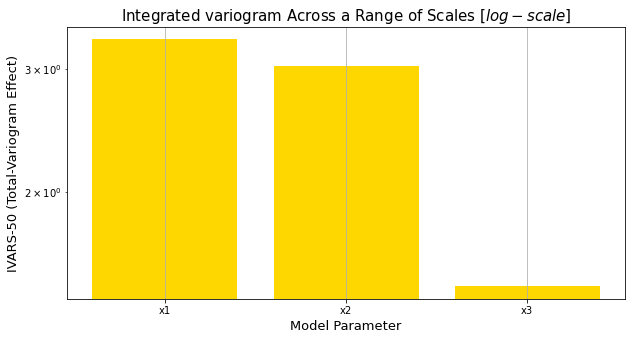

In [17]:
# Plot IVARS from Experiment 1
ivars_scale = 0.5 # Choose the scale range of interest, e.g., 0.1, 0.3, or 0.5

cols = experiment_1.parameters.keys()                     
fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols, experiment_1.ivars.loc[pd.IndexSlice[ ivars_scale ]][cols], color='gold')
plt.gca().set_title (r'Integrated variogram Across a Range of Scales', fontsize = 15)
plt.gca().set_ylabel(r'IVARS-50 (Total-Variogram Effect)', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().grid()
plt.gca().set_yscale('linear')

fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols, experiment_1.ivars.loc[pd.IndexSlice[ ivars_scale ]][cols], color='gold')
plt.gca().set_title (r'Integrated variogram Across a Range of Scales $[log-scale]$', fontsize = 15)
plt.gca().set_ylabel(r'IVARS-50 (Total-Variogram Effect)', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().grid()
plt.gca().set_yscale('log')


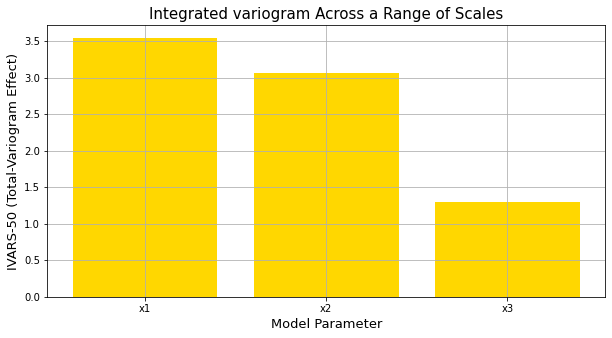

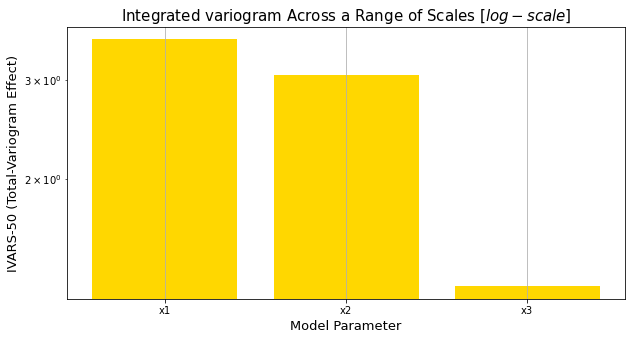

In [18]:
# Plot IVARS from Experiment 2
ivars_scale = 0.5 # Choose the scale range of interest, e.g., 0.1, 0.3, or 0.5

cols = experiment_2.parameters.keys()                     
fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols, experiment_2.ivars.loc[pd.IndexSlice[ ivars_scale ]][cols], color='gold')
plt.gca().set_title (r'Integrated variogram Across a Range of Scales', fontsize = 15)
plt.gca().set_ylabel(r'IVARS-50 (Total-Variogram Effect)', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().grid()
plt.gca().set_yscale('linear')

fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols, experiment_2.ivars.loc[pd.IndexSlice[ ivars_scale ]][cols], color='gold')
plt.gca().set_title (r'Integrated variogram Across a Range of Scales $[log-scale]$', fontsize = 15)
plt.gca().set_ylabel(r'IVARS-50 (Total-Variogram Effect)', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().grid()
plt.gca().set_yscale('log')

Experiment 2 shows similar results to experiment 1 in terms of senstivity for each of the parameters as expected

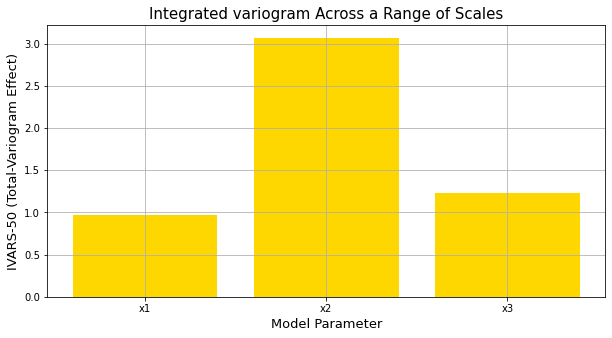

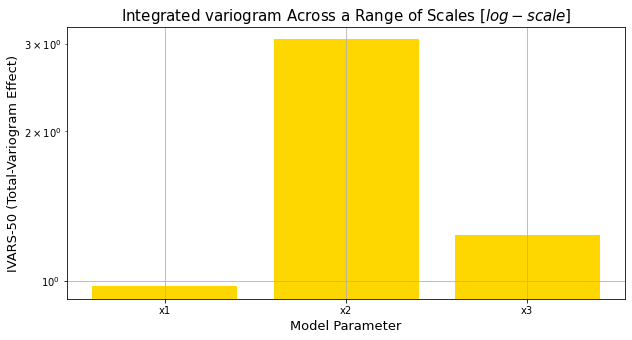

In [19]:
# Plot IVARS from Experiment 3
ivars_scale = 0.5 # Choose the scale range of interest, e.g., 0.1, 0.3, or 0.5

cols = experiment_3.parameters.keys()                     
fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols, experiment_3.ivars.loc[pd.IndexSlice[ ivars_scale ]][cols], color='gold')
plt.gca().set_title (r'Integrated variogram Across a Range of Scales', fontsize = 15)
plt.gca().set_ylabel(r'IVARS-50 (Total-Variogram Effect)', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().grid()
plt.gca().set_yscale('linear')

fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols, experiment_3.ivars.loc[pd.IndexSlice[ ivars_scale ]][cols], color='gold')
plt.gca().set_title (r'Integrated variogram Across a Range of Scales $[log-scale]$', fontsize = 15)
plt.gca().set_ylabel(r'IVARS-50 (Total-Variogram Effect)', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().grid()
plt.gca().set_yscale('log')

The noticable difference in experiment 3 comes from the new correlation between `x1` and `x3`. This is shown in the plots as `x1` has drastically changed in terms of senstivity.

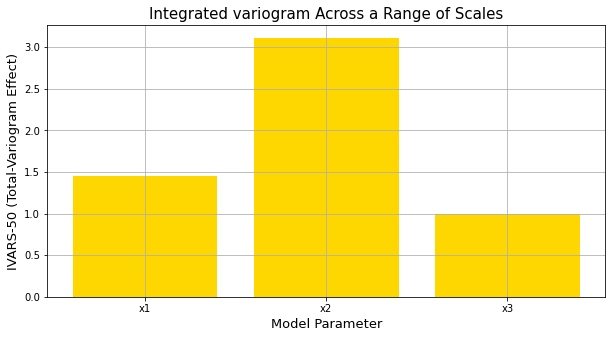

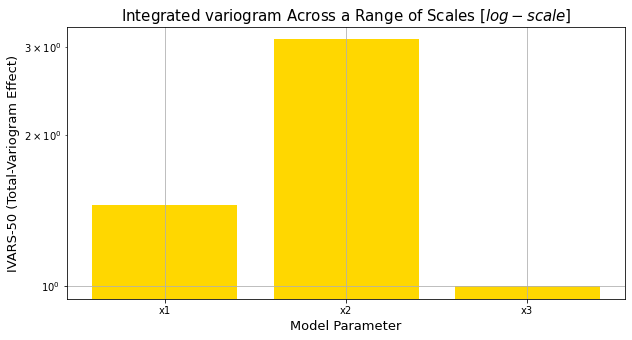

In [20]:
# Plot IVARS from Experiment 4
ivars_scale = 0.5 # Choose the scale range of interest, e.g., 0.1, 0.3, or 0.5

cols = experiment_4.parameters.keys()                     
fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols, experiment_4.ivars.loc[pd.IndexSlice[ ivars_scale ]][cols], color='gold')
plt.gca().set_title (r'Integrated variogram Across a Range of Scales', fontsize = 15)
plt.gca().set_ylabel(r'IVARS-50 (Total-Variogram Effect)', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().grid()
plt.gca().set_yscale('linear')

fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols, experiment_4.ivars.loc[pd.IndexSlice[ ivars_scale ]][cols], color='gold')
plt.gca().set_title (r'Integrated variogram Across a Range of Scales $[log-scale]$', fontsize = 15)
plt.gca().set_ylabel(r'IVARS-50 (Total-Variogram Effect)', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().grid()
plt.gca().set_yscale('log')

Experiment 4 shows different results than the rest of the experiments due to the addition of both correlated parameters `x1` and `x2` along with there being non-uniformly distributed inputs.

**VARS-TO: Sobol Total-Order Effect** 

In addition to the IVARS indices, VARS and GVARS estimate Sobol variance-based total-order effects as side products. Below, print them and plot them.

In [21]:
# VARS-TO from Experiment 1
cols = experiment_1.parameters.keys()
experiment_1.st.to_frame().T[cols]

param,x1,x2,x3
0,0.608621,0.432497,0.176867


In [22]:
# VARS-TO from Experiment 2
cols = experiment_2.parameters.keys()
experiment_2.st.to_frame().T[cols]

param,x1,x2,x3
0,0.508436,0.362669,0.146195


In [23]:
# VARS-TO from Experiment 3
cols = experiment_3.parameters.keys()
experiment_3.st.to_frame().T[cols]

param,x1,x2,x3
0,0.169525,0.439484,0.121525


In [24]:
# VARS-TO from Experiment 4
cols = experiment_4.parameters.keys()
experiment_4.st.to_frame().T[cols]

param,x1,x2,x3
0,0.160315,0.425341,0.117035


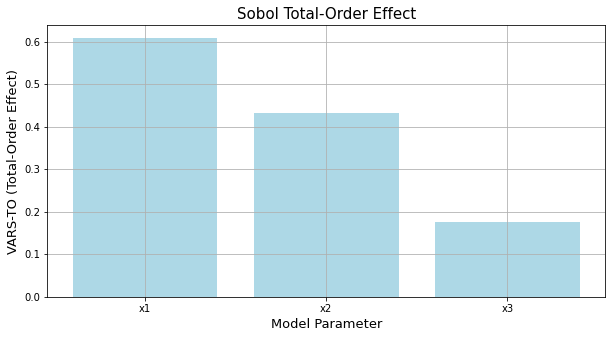

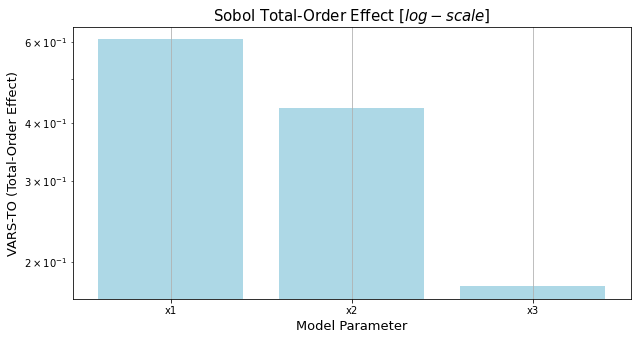

In [25]:
# Plot VARS-TO from Experiment 1
cols = experiment_1.parameters.keys()                     
fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols, experiment_1.st.to_frame().T.iloc[0][cols], color='lightblue')
plt.gca().set_title (r'Sobol Total-Order Effect', fontsize = 15)
plt.gca().set_ylabel(r'VARS-TO (Total-Order Effect)', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().grid()
plt.gca().set_yscale('linear')

fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols, experiment_1.st.to_frame().T.iloc[0][cols], color='lightblue')
plt.gca().set_title (r'Sobol Total-Order Effect $[log-scale]$', fontsize = 15)
plt.gca().set_ylabel(r'VARS-TO (Total-Order Effect)', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().grid()
plt.gca().set_yscale('log')

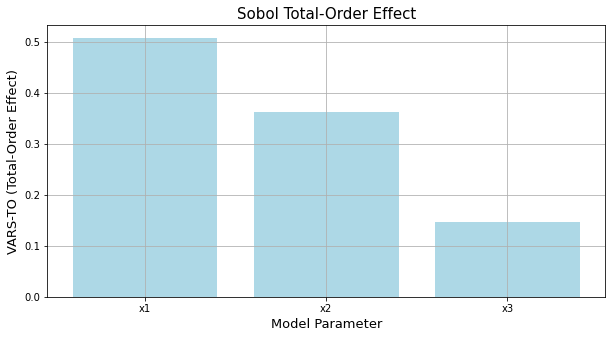

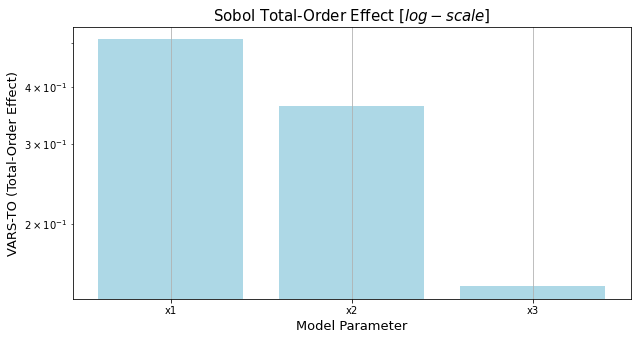

In [26]:
# Plot VARS-TO from Experiment 2
cols = experiment_2.parameters.keys()                     
fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols, experiment_2.st.to_frame().T.iloc[0][cols], color='lightblue')
plt.gca().set_title (r'Sobol Total-Order Effect', fontsize = 15)
plt.gca().set_ylabel(r'VARS-TO (Total-Order Effect)', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().grid()
plt.gca().set_yscale('linear')

fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols, experiment_2.st.to_frame().T.iloc[0][cols], color='lightblue')
plt.gca().set_title (r'Sobol Total-Order Effect $[log-scale]$', fontsize = 15)
plt.gca().set_ylabel(r'VARS-TO (Total-Order Effect)', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().grid()
plt.gca().set_yscale('log')

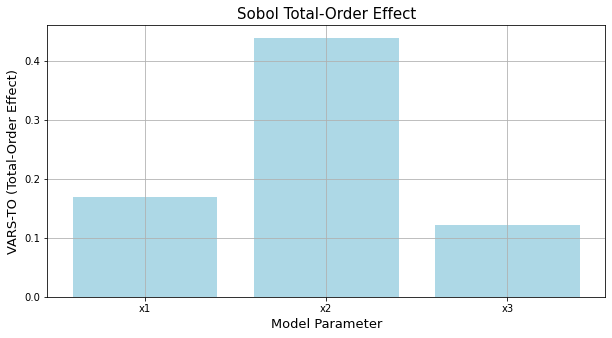

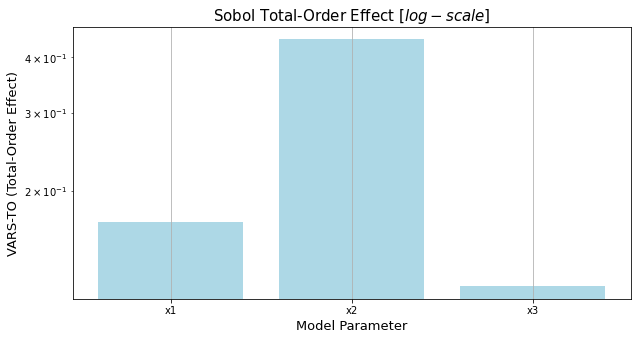

In [27]:
# Plot VARS-TO from Experiment 3
cols = experiment_3.parameters.keys()                     
fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols, experiment_3.st.to_frame().T.iloc[0][cols], color='lightblue')
plt.gca().set_title (r'Sobol Total-Order Effect', fontsize = 15)
plt.gca().set_ylabel(r'VARS-TO (Total-Order Effect)', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().grid()
plt.gca().set_yscale('linear')

fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols, experiment_3.st.to_frame().T.iloc[0][cols], color='lightblue')
plt.gca().set_title (r'Sobol Total-Order Effect $[log-scale]$', fontsize = 15)
plt.gca().set_ylabel(r'VARS-TO (Total-Order Effect)', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().grid()
plt.gca().set_yscale('log')

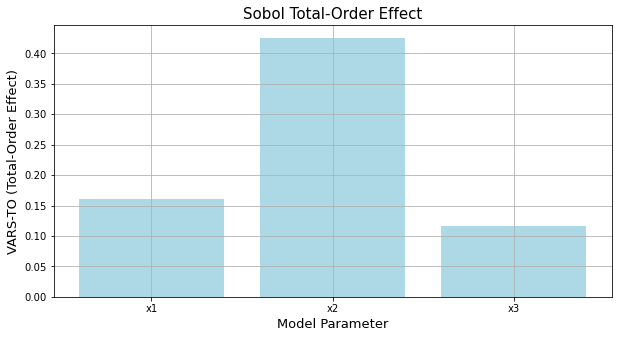

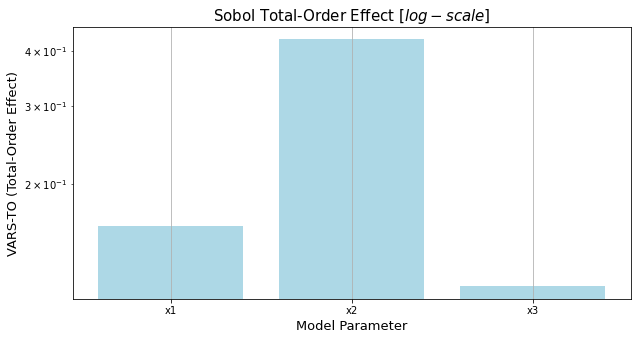

In [28]:
# Plot VARS-TO from Experiment 4
cols = experiment_4.parameters.keys()                     
fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols, experiment_4.st.to_frame().T.iloc[0][cols], color='lightblue')
plt.gca().set_title (r'Sobol Total-Order Effect', fontsize = 15)
plt.gca().set_ylabel(r'VARS-TO (Total-Order Effect)', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().grid()
plt.gca().set_yscale('linear')

fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols, experiment_4.st.to_frame().T.iloc[0][cols], color='lightblue')
plt.gca().set_title (r'Sobol Total-Order Effect $[log-scale]$', fontsize = 15)
plt.gca().set_ylabel(r'VARS-TO (Total-Order Effect)', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().grid()
plt.gca().set_yscale('log')

The Sobol Total-Order Effect approach confirms our analysis from the IVARS-50 approach as the results are similar in shape.

**VARS-ABE & VARS-ACE: Morris Elementary Effects** 

In addition to the IVARS and Sobol indices, VARS and GVARS estimate various versions of Morris derivative-based elementary effects as side products, **mean ABsolute Elementary effect (ABE)** and **mean ACtual elementary effect (ACE)**.

    POINT: In the derivative-based approach, the user needs to choose a delta (step size) for numerical estimation of derivatives. Recommended is to go with the smallest delta available here, which is equal to delta_h, but the user could choose any integer product of delta_h as well.

 Below, print VARS-ABE & VARS-ACE and then plot them.

In [29]:
# delta_of_interest = experiment_1.maee.to_frame().unstack(level=0).index.min() # This lines chooses the smallest delta
delta_of_interest = 0.1  # This line can be used to set other values for delta

In [30]:
# VARS-ABE from Experiment 1
experiment_1.maee.to_frame().unstack(level=0).loc[delta_of_interest].to_frame().T

0                    
param        x1        x2        x3
0.1    1.088407  2.768462  0.928325

In [31]:
# VARS-ACE from Experiment 1
experiment_1.mee.to_frame().unstack(level=0).loc[delta_of_interest].to_frame().T

0                    
param        x1        x2        x3
0.1    0.199938  0.001649  0.000819

In [32]:
# VARS-ABE from Experiment 2
experiment_2.maee.to_frame().unstack(level=0).loc[delta_of_interest].to_frame().T

0                    
param        x1        x2        x3
0.1    0.962297  2.728393  0.834846

In [33]:
# VARS-ACE from Experiment 2
experiment_2.mee.to_frame().unstack(level=0).loc[delta_of_interest].to_frame().T

0                    
param       x1        x2        x3
0.1    0.03574  0.149139 -0.047576

In [34]:
# VARS-ABE from Experiment 3
experiment_3.maee.to_frame().unstack(level=0).loc[delta_of_interest].to_frame().T

0                    
param        x1        x2        x3
0.1    1.092593  2.728393  0.965783

In [35]:
# VARS-ACE from Experiment 3
experiment_3.mee.to_frame().unstack(level=0).loc[delta_of_interest].to_frame().T

0                    
param        x1        x2        x3
0.1    0.012146  0.149139  0.050002

In [36]:
# VARS-ABE from Experiment 4
experiment_4.maee.to_frame().unstack(level=0).loc[delta_of_interest].to_frame().T

0                    
param        x1        x2        x3
0.1    1.015711  2.331531  1.025352

In [37]:
# VARS-ACE from Experiment 4
experiment_4.mee.to_frame().unstack(level=0).loc[delta_of_interest].to_frame().T

0                    
param        x1        x2        x3
0.1    0.016644  0.024194  0.057645

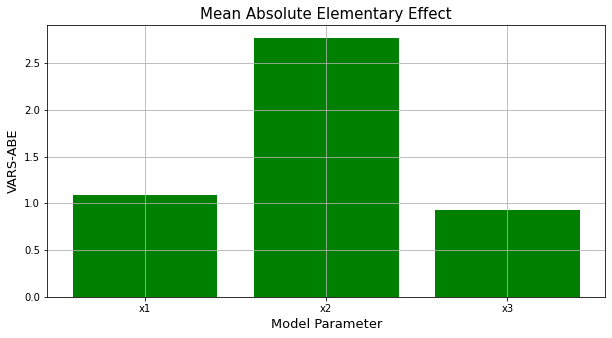

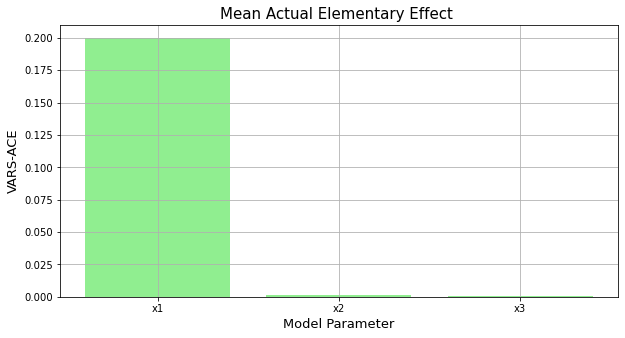

In [38]:
# Plot VARS-ACE and  VARS-ABE from Experiment 1
cols = experiment_1.parameters.keys()                     
fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols, experiment_1.maee.to_frame().unstack(level=0).loc[delta_of_interest].to_frame().T.iloc[0], color='green')
plt.gca().set_title (r'Mean Absolute Elementary Effect', fontsize = 15)
plt.gca().set_ylabel(r'VARS-ABE', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().grid()
plt.gca().set_yscale('linear')

fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols, experiment_1.mee.to_frame().unstack(level=0).loc[delta_of_interest].to_frame().T.iloc[0], color='lightgreen')
plt.gca().set_title (r'Mean Actual Elementary Effect ', fontsize = 15)
plt.gca().set_ylabel(r'VARS-ACE', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().grid()
plt.gca().set_yscale('linear')

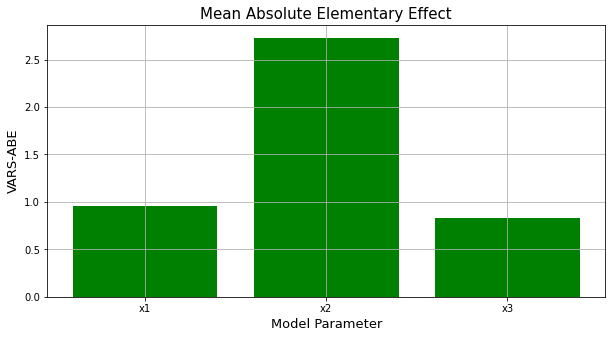

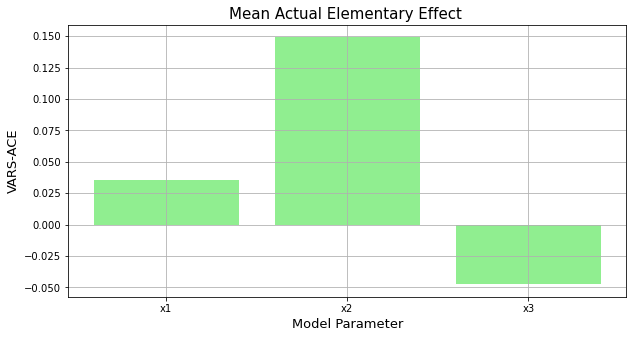

In [39]:
# Plot VARS-ACE and  VARS-ABE from Experiment 2
cols = experiment_2.parameters.keys()                     
fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols, experiment_2.maee.to_frame().unstack(level=0).loc[delta_of_interest].to_frame().T.iloc[0], color='green')
plt.gca().set_title (r'Mean Absolute Elementary Effect', fontsize = 15)
plt.gca().set_ylabel(r'VARS-ABE', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().grid()
plt.gca().set_yscale('linear')

fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols, experiment_2.mee.to_frame().unstack(level=0).loc[delta_of_interest].to_frame().T.iloc[0], color='lightgreen')
plt.gca().set_title (r'Mean Actual Elementary Effect ', fontsize = 15)
plt.gca().set_ylabel(r'VARS-ACE', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().grid()
plt.gca().set_yscale('linear')

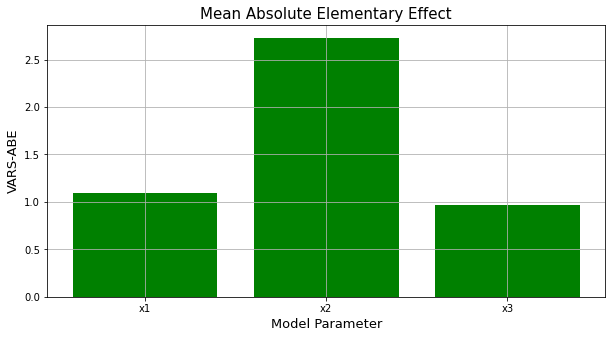

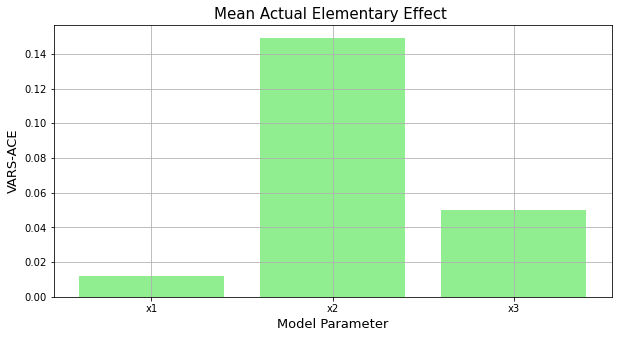

In [40]:
# Plot VARS-ACE and  VARS-ABE from Experiment 3
cols = experiment_3.parameters.keys()                     
fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols, experiment_3.maee.to_frame().unstack(level=0).loc[delta_of_interest].to_frame().T.iloc[0], color='green')
plt.gca().set_title (r'Mean Absolute Elementary Effect', fontsize = 15)
plt.gca().set_ylabel(r'VARS-ABE', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().grid()
plt.gca().set_yscale('linear')

fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols, experiment_3.mee.to_frame().unstack(level=0).loc[delta_of_interest].to_frame().T.iloc[0], color='lightgreen')
plt.gca().set_title (r'Mean Actual Elementary Effect ', fontsize = 15)
plt.gca().set_ylabel(r'VARS-ACE', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().grid()
plt.gca().set_yscale('linear')

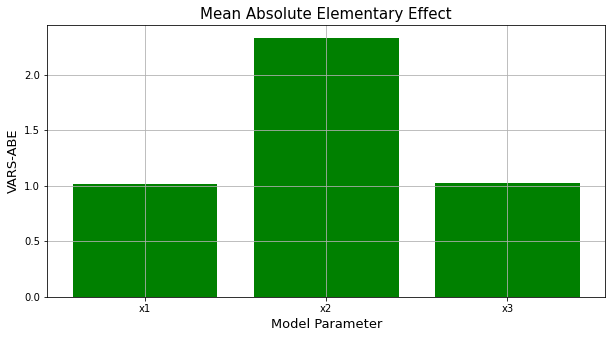

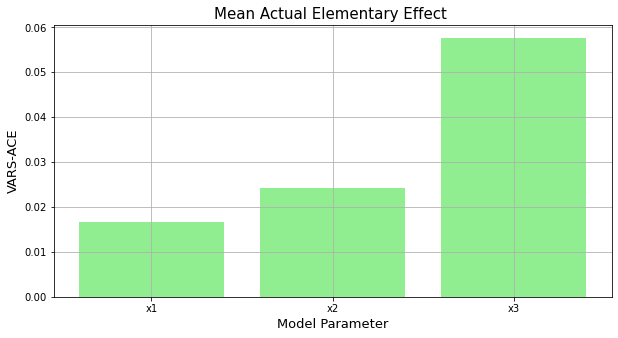

In [41]:
# Plot VARS-ACE and  VARS-ABE from Experiment 4
cols = experiment_4.parameters.keys()                     
fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols, experiment_4.maee.to_frame().unstack(level=0).loc[delta_of_interest].to_frame().T.iloc[0], color='green')
plt.gca().set_title (r'Mean Absolute Elementary Effect', fontsize = 15)
plt.gca().set_ylabel(r'VARS-ABE', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().grid()
plt.gca().set_yscale('linear')

fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols, experiment_4.mee.to_frame().unstack(level=0).loc[delta_of_interest].to_frame().T.iloc[0], color='lightgreen')
plt.gca().set_title (r'Mean Actual Elementary Effect ', fontsize = 15)
plt.gca().set_ylabel(r'VARS-ACE', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().grid()
plt.gca().set_yscale('linear')

As you may notice the derivate based approaches give us different results as the previous approaches (IVARS-50 and Sobol Total-Order Effect) were based on variograms and variance which are related to eachother. This gives us another perspective on the determination of different variable sensitivities.

**Directional Variograms - γ(h)** 

For advanced users of VARS, directional variograms may provide a wealth of information about the structure of the model response surface.

    POINT: Variograms are most meaningful when h (perturbation scale) is between zero and 0.5 of the parameter ranges, but the user can investigate the entire perturbation range (0 – 1).
    
 Below, print the directional variograms and then plot them.

In [42]:
# Directional Variograms from Experiment 1
cols = experiment_1.parameters.keys()
variograms1 = experiment_1.gamma.unstack(0)[cols].copy()
variograms1

param,x1,x2,x3
h,,,
0.1,1.321946,4.583958,1.198033
0.2,4.327951,11.717131,2.707489
0.3,7.929312,10.343483,3.681246
0.4,11.811035,3.713339,4.409495
0.5,15.484467,0.000031,5.231978
0.6,17.298034,5.005346,6.158166
0.7,15.280678,12.780560,6.683289
0.8,9.436998,8.504503,5.823492
0.9,2.888904,1.045638,2.928771


In [43]:
# Directional Variograms from Experiment 2
cols = experiment_2.parameters.keys()                     
variograms2 = experiment_2.gamma.unstack(0)[cols].copy()
variograms2

param,x1,x2,x3
h,,,
0.025,0.127665,0.439353,0.109752
0.100,1.077041,4.693541,1.108604
0.200,4.303853,11.353511,2.278390
0.300,8.420409,10.657411,3.213099
0.400,12.858829,3.798086,3.903487
0.500,17.559712,0.328512,4.820513
0.600,17.929808,5.219234,5.859016
0.700,14.879516,10.929115,7.485004
0.800,11.098217,8.055513,5.176442


In [44]:
# Directional Variograms from Experiment 3
cols = experiment_3.parameters.keys()                     
variograms3 = experiment_3.gamma.unstack(0)[cols].copy()
variograms3

param,x1,x2,x3
h,,,
0.025,0.257898,0.439353,0.120678
0.100,1.364741,4.693541,1.039490
0.200,2.612481,11.353511,2.492513
0.300,2.340348,10.657411,3.069730
0.400,1.956496,3.798086,3.564107
0.500,2.926848,0.328512,4.368629
0.600,2.932845,5.219234,6.728125
0.700,3.205121,10.929115,7.334829
0.800,3.002881,8.055513,2.221629


In [45]:
# Directional Variograms from Experiment 4
cols = experiment_4.parameters.keys()                     
variograms4 = experiment_4.gamma.unstack(0)[cols].copy()
variograms4

param,x1,x2,x3
h,,,
0.025,0.231797,0.351338,0.172052
0.100,1.153091,3.644960,1.289665
0.200,2.283042,10.163205,2.291320
0.300,3.122266,11.216990,2.630221
0.400,4.788326,5.689682,3.097547
0.500,6.342137,0.778955,1.339198
0.600,6.448400,1.900912,4.090320
0.700,3.616893,8.012699,4.082655
0.800,1.604617,12.090187,NaN


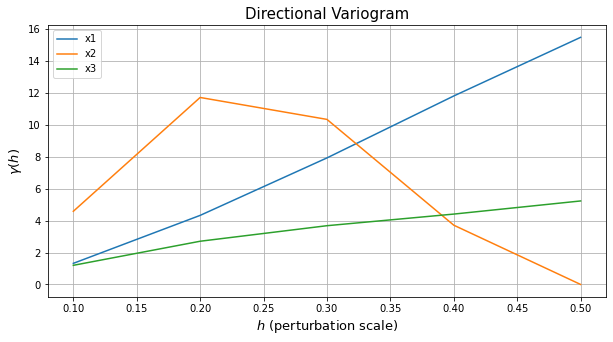

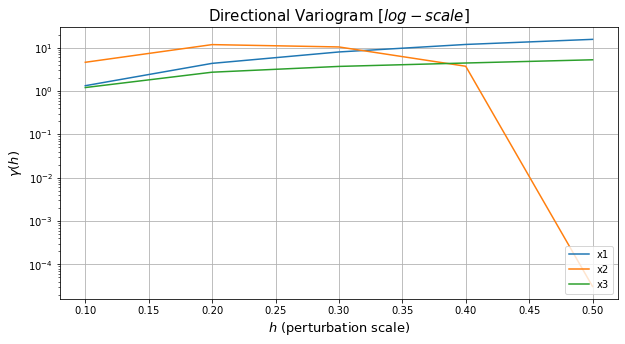

In [46]:
# Plot Directional Variograms from Experiment 1

plotting_scale = 0.5 # any number between delta_h and one.

matrix_y = variograms1.loc[variograms1.index <= plotting_scale].to_numpy()
column_x = variograms1.loc[variograms1.index <= plotting_scale].index.to_numpy()
matrix_x = np.tile(column_x, (matrix_y.shape[1], 1)).T

fig_cdf = plt.figure(figsize=(10,5))
plt.gca().plot(matrix_x, matrix_y )
plt.gca().set_title (r'Directional Variogram', fontsize = 15)
plt.gca().set_ylabel(r'$γ(h)$', fontsize = 13)
plt.gca().set_xlabel(r'$h$ (perturbation scale)', fontsize=13)
plt.gca().set_yscale('linear')
plt.gca().legend (cols, loc='upper left', fontsize = 10)
plt.gca().grid()

fig_cdf = plt.figure(figsize=(10,5))
plt.gca().plot(matrix_x, matrix_y )
plt.gca().set_title (r'Directional Variogram $[log-scale]$', fontsize = 15)
plt.gca().set_ylabel(r'$γ(h)$', fontsize = 13)
plt.gca().set_xlabel(r'$h$ (perturbation scale)', fontsize=13)
plt.gca().set_yscale('log')
plt.gca().legend (cols, loc='lower right', fontsize = 10)
plt.gca().grid()

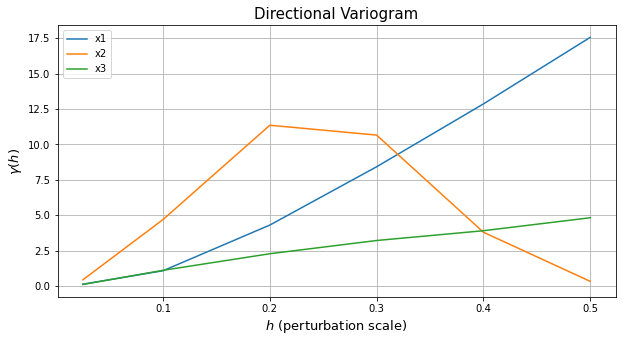

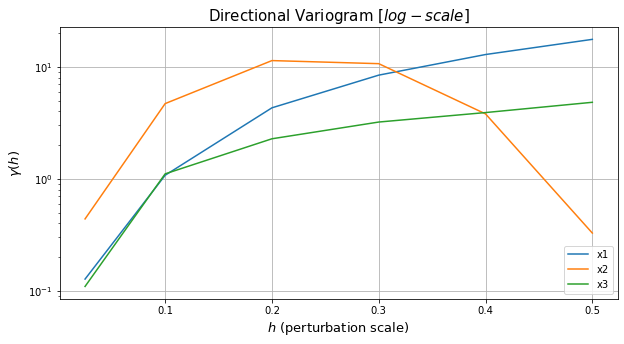

In [47]:
# Plot Directional Variograms from Experiment 2

plotting_scale = 0.5 # any number between delta_h and one.

matrix_y = variograms2.loc[variograms2.index <= plotting_scale].to_numpy()
column_x = variograms2.loc[variograms2.index <= plotting_scale].index.to_numpy()
matrix_x = np.tile(column_x, (matrix_y.shape[1], 1)).T

fig_cdf = plt.figure(figsize=(10,5))
plt.gca().plot(matrix_x, matrix_y )
plt.gca().set_title (r'Directional Variogram', fontsize = 15)
plt.gca().set_ylabel(r'$γ(h)$', fontsize = 13)
plt.gca().set_xlabel(r'$h$ (perturbation scale)', fontsize=13)
plt.gca().set_yscale('linear')
plt.gca().legend (cols, loc='upper left', fontsize = 10)
plt.gca().grid()

fig_cdf = plt.figure(figsize=(10,5))
plt.gca().plot(matrix_x, matrix_y )
plt.gca().set_title (r'Directional Variogram $[log-scale]$', fontsize = 15)
plt.gca().set_ylabel(r'$γ(h)$', fontsize = 13)
plt.gca().set_xlabel(r'$h$ (perturbation scale)', fontsize=13)
plt.gca().set_yscale('log')
plt.gca().legend (cols, loc='lower right', fontsize = 10)
plt.gca().grid()

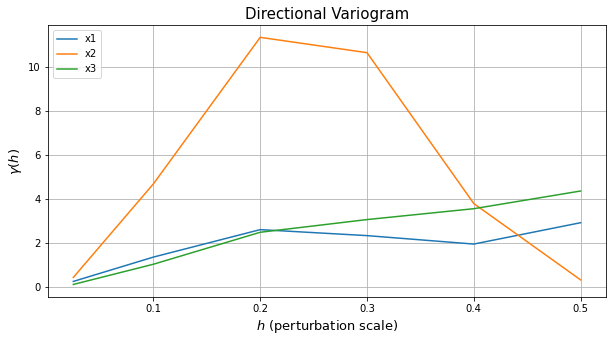

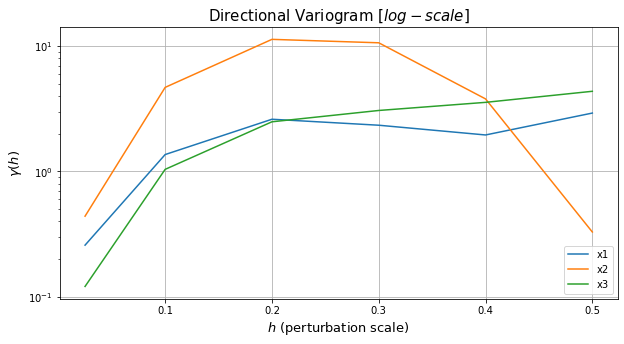

In [48]:
# Plot Directional Variograms from Experiment 3

plotting_scale = 0.5 # any number between delta_h and one.

matrix_y = variograms3.loc[variograms3.index <= plotting_scale].to_numpy()
column_x = variograms3.loc[variograms3.index <= plotting_scale].index.to_numpy()
matrix_x = np.tile(column_x, (matrix_y.shape[1], 1)).T

fig_cdf = plt.figure(figsize=(10,5))
plt.gca().plot(matrix_x, matrix_y )
plt.gca().set_title (r'Directional Variogram', fontsize = 15)
plt.gca().set_ylabel(r'$γ(h)$', fontsize = 13)
plt.gca().set_xlabel(r'$h$ (perturbation scale)', fontsize=13)
plt.gca().set_yscale('linear')
plt.gca().legend (cols, loc='upper left', fontsize = 10)
plt.gca().grid()

fig_cdf = plt.figure(figsize=(10,5))
plt.gca().plot(matrix_x, matrix_y )
plt.gca().set_title (r'Directional Variogram $[log-scale]$', fontsize = 15)
plt.gca().set_ylabel(r'$γ(h)$', fontsize = 13)
plt.gca().set_xlabel(r'$h$ (perturbation scale)', fontsize=13)
plt.gca().set_yscale('log')
plt.gca().legend (cols, loc='lower right', fontsize = 10)
plt.gca().grid()

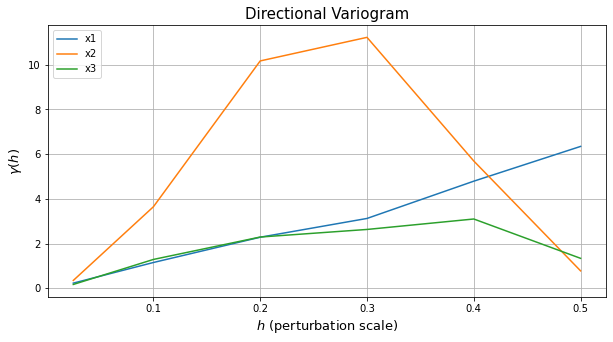

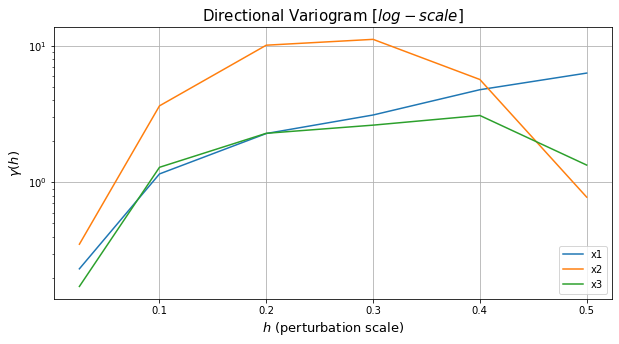

In [49]:
# Plot Directional Variograms from Experiment 4

plotting_scale = 0.5 # any number between delta_h and one.

matrix_y = variograms4.loc[variograms4.index <= plotting_scale].to_numpy()
column_x = variograms4.loc[variograms4.index <= plotting_scale].index.to_numpy()
matrix_x = np.tile(column_x, (matrix_y.shape[1], 1)).T

fig_cdf = plt.figure(figsize=(10,5))
plt.gca().plot(matrix_x, matrix_y )
plt.gca().set_title (r'Directional Variogram', fontsize = 15)
plt.gca().set_ylabel(r'$γ(h)$', fontsize = 13)
plt.gca().set_xlabel(r'$h$ (perturbation scale)', fontsize=13)
plt.gca().set_yscale('linear')
plt.gca().legend (cols, loc='upper left', fontsize = 10)
plt.gca().grid()

fig_cdf = plt.figure(figsize=(10,5))
plt.gca().plot(matrix_x, matrix_y )
plt.gca().set_title (r'Directional Variogram $[log-scale]$', fontsize = 15)
plt.gca().set_ylabel(r'$γ(h)$', fontsize = 13)
plt.gca().set_xlabel(r'$h$ (perturbation scale)', fontsize=13)
plt.gca().set_yscale('log')
plt.gca().legend (cols, loc='lower right', fontsize = 10)
plt.gca().grid()

**Bootstrap results for assessing the uncertainty and robustness of SA** 

The user of SA may need to assess the uncertainty around any of the results reported above and their robustness against sampling size and variability. To do so, when setting up the SA experiment above, make sure to turn on the bootstrap_flag, and choose a bootrtap size and confidence interval, like shown bellow.

bootstrap_flag = True,

bootstrap_size = 1000, (recommended to be greater than 100; the bigger the number the more accurate the estimate)

bootstrap_ci   = 0.9, (a confidence interval of 0.9 means that with a likelihood of 90%, the true value is within the intervals generated by bootstrap)

Bootstrap-generated upper and lower bounds:

In [50]:
# IVARS from Experiment 1 with bootstrap
cols = experiment_1.parameters.keys()
print('Upper Bounds on IVARS based on bootstrapping'); display(experiment_1.ivarsub[cols])
print('Lower Bounds on IVARS based on bootstrapping'); display(experiment_1.ivarslb[cols])

Upper Bounds on IVARS based on bootstrapping


,x1,x2,x3
0.1,0.083305,0.229925,0.067597
0.3,1.210406,2.149839,0.649238
0.5,4.173833,3.037228,1.652323


Lower Bounds on IVARS based on bootstrapping


,x1,x2,x3
0.1,0.047304,0.228288,0.052049
0.3,0.687859,2.144084,0.498606
0.5,2.370871,3.034646,1.266826


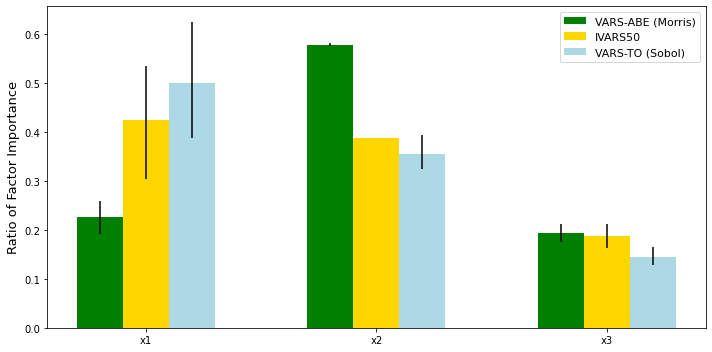

In [51]:
# Plot IVARS50, VARS-TO, and VARS-ABE along with their confidence intervals from Experiment 1
ax =experiment_1.factorimportance_plot()

Factor rankings and their bootstrap-generated robustness:
 
     () Rank zero indicates the most influential parameter, one the second most influential, etc.
     
     () The higher the robustness value (also called reliability) the better (maximum one). A robustness of one for a parameter means that parameter received its respective rank in every instance of bootstrap re-samplings (maximum robustness). And, for example, a robustness of 0.7 means the respective rank turned out to be the case in 70% of bootstrap re-samplings.



In [52]:
# Rankings and Robustness from Experiment 1
cols = experiment_1.parameters.keys()
print('Parameter Rankings'); display(experiment_1.ivars_factor_ranking[cols])
print('Robustness of Rankings'); display(experiment_1.rel_ivars_factor_ranking[cols])

Parameter Rankings


,x1,x2,x3
0.1,1,0,2
0.3,1,0,2
0.5,0,1,2


Robustness of Rankings


,x1,x2,x3
0.1,0.66,1.0,0.66
0.3,0.98,1.0,0.98
0.5,0.70,0.7,1.00


In the case of high-dimensional problems (models with many inputs), the user may want to group parameters together based on their importance characterized by SA. To do so, when setting up the SA experiment above, make sure to turn on the grouping_flag and choose the number of groups of interest. Also, make sure that the bootstrap_flag is on.

grouping_flag  = True, 
num_grps       = 2, (any number smaller than the number of parameters)

In [53]:
# Grouping of parameters from Experiment 1
cols = experiment_1.parameters.keys()
experiment_1.ivars50_grp[cols]

,x1,x2,x3
0.5,2,2,1


### Delve deeper - Additional information for advanced users

The information below are also available to the user, if there is interest in further exploring what is happening under the hood.

**Cross sections of sample points in the input space**

Choose any pair of parameters and see the projection of all star centers and star points onto their two-dimensional space.

<AxesSubplot:title={'center':'Star Points'}, xlabel='x2', ylabel='x3'>

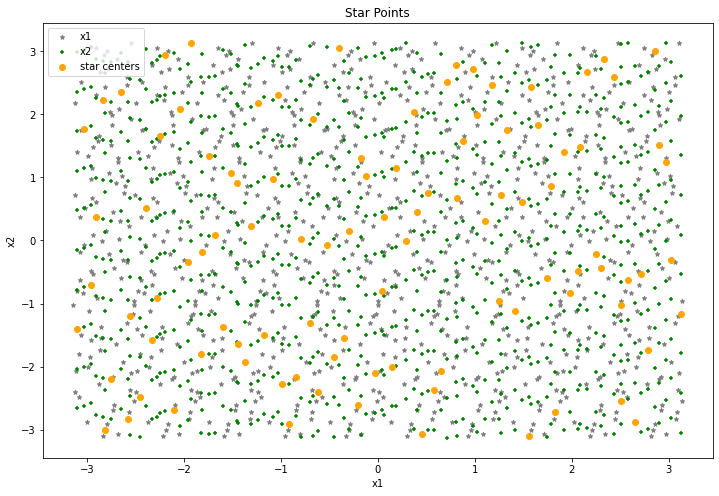

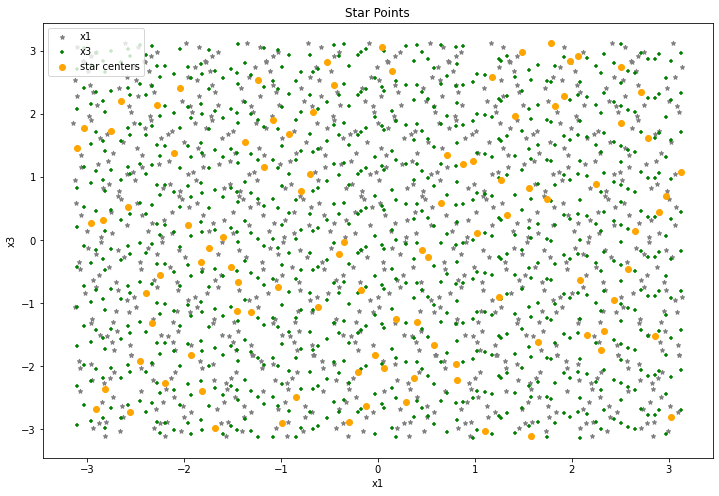

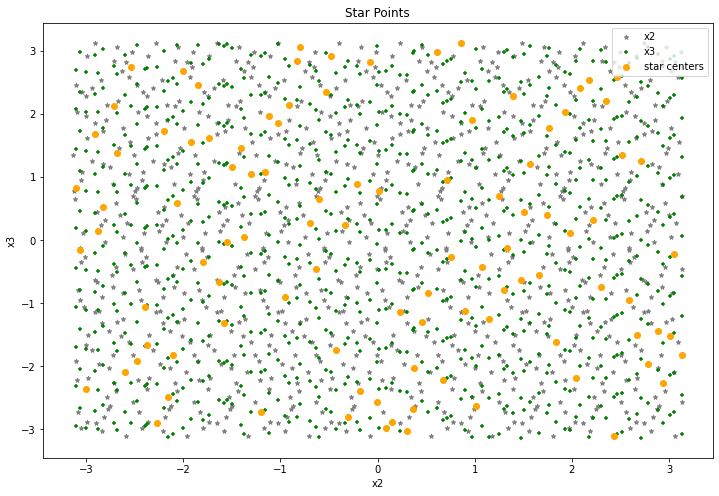

In [54]:
names = ['x1', 'x2']; experiment_1.correlation_plot(param_names=names)
names = ['x1', 'x3']; experiment_1.correlation_plot(param_names=names)
names = ['x2', 'x3']; experiment_1.correlation_plot(param_names=names)

<AxesSubplot:title={'center':'Star Points'}, xlabel='x2', ylabel='x3'>

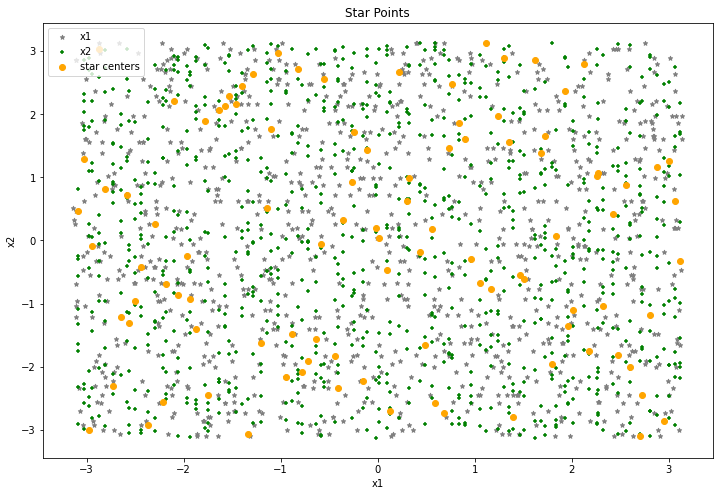

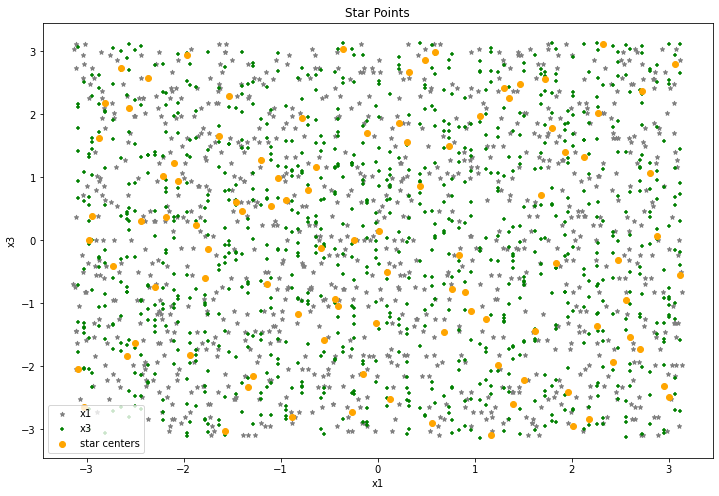

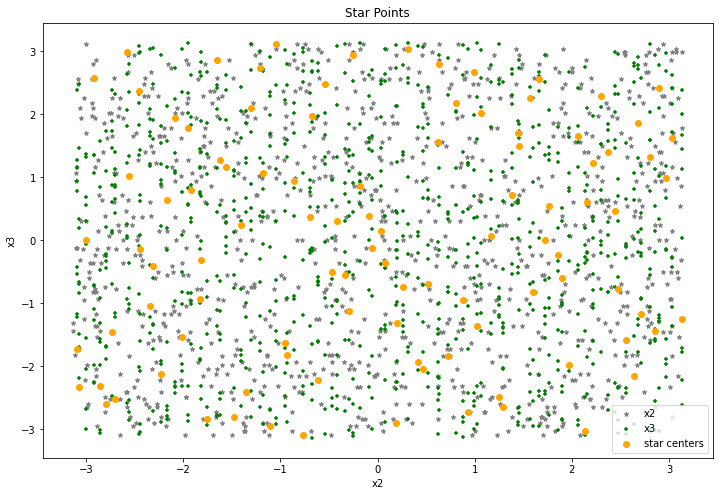

In [55]:
experiment_2.correlation_plot(param_names=['x1', 'x2'])
experiment_2.correlation_plot(param_names=['x1', 'x3'])
experiment_2.correlation_plot(param_names=['x2', 'x3'])

<AxesSubplot:title={'center':'Star Points'}, xlabel='x2', ylabel='x3'>

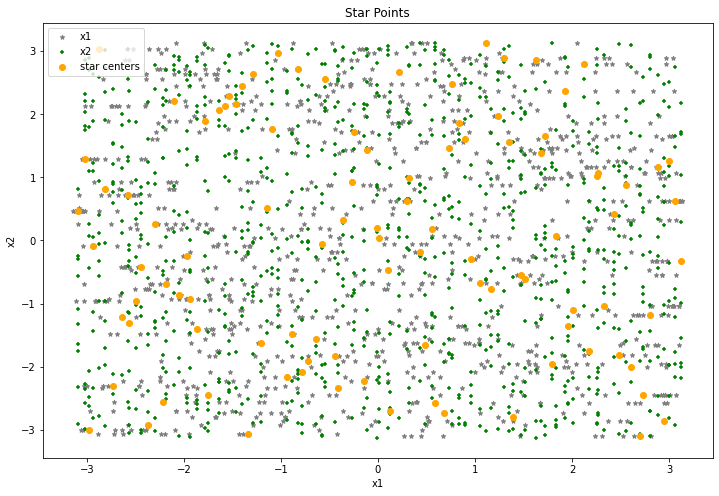

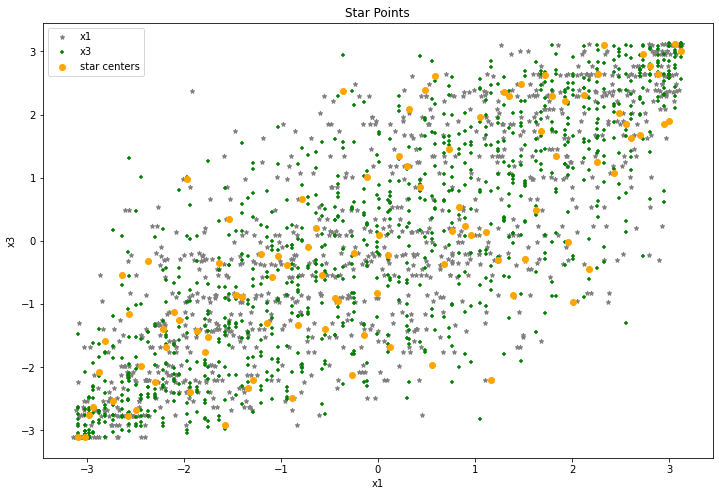

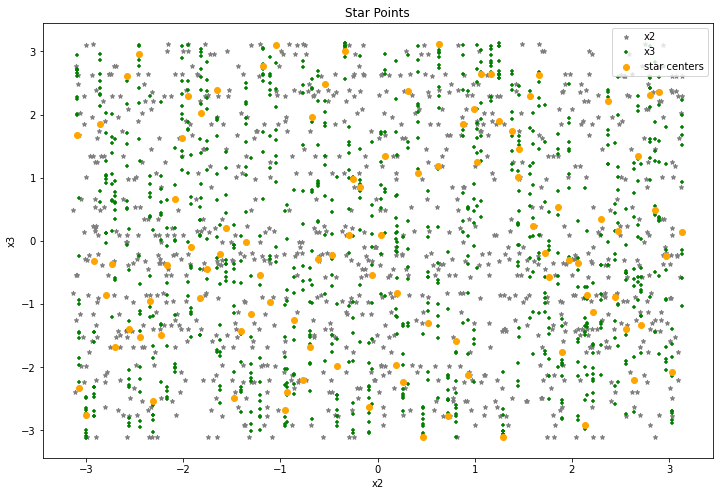

In [56]:
experiment_3.correlation_plot(param_names=['x1', 'x2'])
experiment_3.correlation_plot(param_names=['x1', 'x3'])
experiment_3.correlation_plot(param_names=['x2', 'x3'])

<AxesSubplot:title={'center':'Star Points'}, xlabel='x2', ylabel='x3'>

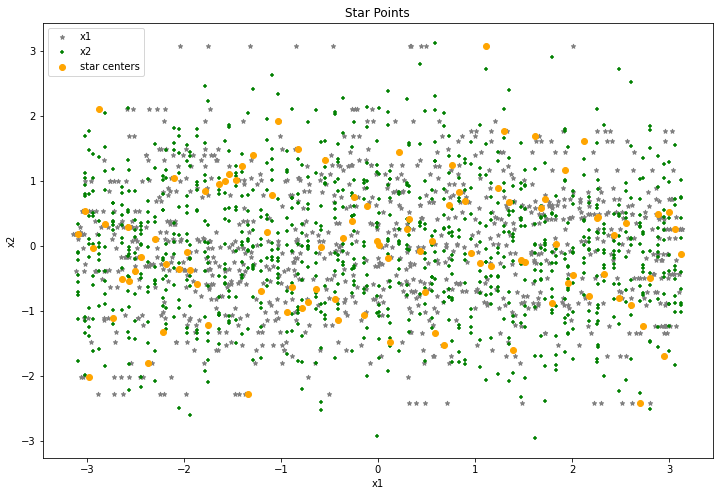

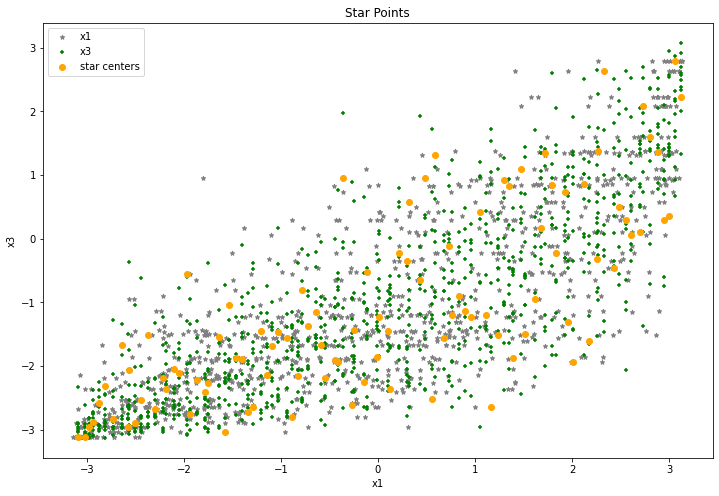

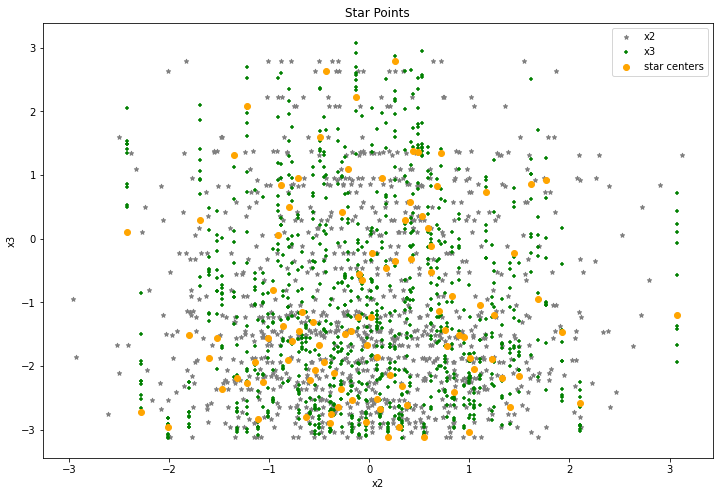

In [57]:
experiment_4.correlation_plot(param_names=['x1', 'x2'])
experiment_4.correlation_plot(param_names=['x1', 'x3'])
experiment_4.correlation_plot(param_names=['x2', 'x3'])

**Star centers used in the GVARS experiment**

The following dataframe includes all the star centers generated.

In [58]:
# Star centers generated in Experiment 1
cols = experiment_1.parameters.keys()
pd.DataFrame(data=experiment_1.star_centres, columns=cols)

,x1,x2,x3
0,-0.030616,-2.101720,-1.818364
1,-1.682805,0.089523,-2.972290
2,1.268138,0.713335,0.953884
3,-2.958892,-0.700412,0.272722
4,-0.912726,-2.906156,1.686193
...,...,...,...
95,-0.989167,-2.276674,-2.904580
96,2.580588,-0.634688,-0.450072
97,1.419989,-1.117925,1.966695
98,-2.558959,-1.205427,-2.724756


In [59]:
# Star centers generated in Experiment 2
cols = experiment_2.parameters.keys()
pd.DataFrame(data=experiment_2.star_centres, columns=cols)

,x1,x2,x3
0,2.999505,1.251886,-2.481172
1,-1.206659,-1.626216,1.278303
2,-0.550067,2.559299,-1.583663
3,-2.725520,-2.310860,-0.400583
4,2.324530,-1.042114,3.114741
...,...,...,...
95,0.767409,2.472424,-0.769908
96,2.122693,2.804077,1.321427
97,-0.942450,-2.163914,0.638391
98,2.882203,1.165998,0.073662


In [60]:
# Star centers generated in Experiment 3
cols = experiment_3.parameters.keys()
pd.DataFrame(data=experiment_3.star_centres, columns=cols)

,x1,x2,x3
0,2.999505,1.251886,1.904267
1,-1.206659,-1.626216,-0.202118
2,-0.550067,2.559299,-1.388042
3,-2.725520,-2.310860,-2.533551
4,2.324530,-1.042114,3.100091
...,...,...,...
95,0.767409,2.472424,0.154292
96,2.122693,2.804077,2.317497
97,-0.942450,-2.163914,-0.383889
98,2.882203,1.165998,2.640833


In [61]:
# Star centers generated in Experiment 4
cols = experiment_4.parameters.keys()
pd.DataFrame(data=experiment_4.star_centres, columns=cols)

,x1,x2,x3
0,2.999505,0.522517,0.354250
1,-1.206659,-0.702934,-1.441321
2,-0.550067,1.325707,-2.192551
3,-2.725520,-1.116853,-2.829079
4,2.324530,-0.428734,2.639370
...,...,...,...
95,0.767409,1.246438,-1.190155
96,2.122693,1.611909,0.867266
97,-0.942450,-1.013429,-1.564256
98,2.882203,0.483610,1.369472


**Star points generated along with respective outputs**

The following dataframe includes all the star points generated. For each row, the first column indicates the associated star center, the second column indicates the parameter along which the cross-sectional samples were taken, and the third column indicates the star point numbers along that cross section. The last column indicates the evaluated model response (output) for the input set in each row.

In [62]:
# Star points generated in Experiment 1
experiment_1.model_df

x1        x2        x3  ishigami
centre param points                                        
0      x1    0      -2.542616 -2.101720 -1.818364  4.025234
             1      -1.914616 -2.101720 -1.818364  3.234660
             2      -1.286616 -2.101720 -1.818364  3.196107
             3      -0.658616 -2.101720 -1.818364  3.924287
             4      -0.030616 -2.101720 -1.818364  5.141333
...                       ...       ...       ...       ...
99     x3    5      -2.195769  2.940417  0.246173 -0.531776
             6      -2.195769  2.940417  0.874173 -0.578837
             7      -2.195769  2.940417  1.502173 -0.944421
             8      -2.195769  2.940417  2.130173 -2.201297
             9      -2.195769  2.940417  2.758173 -5.224968

[3000 rows x 4 columns]

In [63]:
# Star points generated in Experiment 2
experiment_2.model_df

x1        x2        x3   ishigami
centre param points                                         
0      x1    0      -2.168600  1.251886 -2.481172   2.352680
             1       1.818407  1.251886 -2.481172  10.955693
             2      -0.113028  1.251886 -2.481172   5.771644
             3       1.130819  1.251886 -2.481172  10.645597
             4      -2.429365  1.251886 -2.481172   3.181583
...                       ...       ...       ...        ...
99     x3    5       1.721361  1.658161  0.043986   7.935395
             6       1.721361  1.658161  1.550313   8.506526
             7       1.721361  1.658161  2.667597  12.941955
             8       1.721361  1.658161 -2.471560  11.624686
             9       1.721361  1.658161 -2.131571   9.976466

[3000 rows x 4 columns]

In [64]:
# Star points generated in Experiment 3
experiment_3.model_df

x1        x2        x3   ishigami
centre param points                                         
0      x1    0       0.257173  1.251886  1.904267   6.900686
             1       2.370188  1.251886  1.904267   7.925738
             2       1.556647  1.251886  1.904267   8.626607
             3       2.091389  1.251886  1.904267   8.320164
             4      -0.024095  1.251886  1.904267   6.256110
...                       ...       ...       ...        ...
99     x3    5       1.721361  1.658161  1.464022   8.389596
             6       1.721361  1.658161  2.141582  10.015079
             7       1.721361  1.658161  2.676828  13.011612
             8       1.721361  1.658161 -0.281043   7.936011
             9       1.721361  1.658161  0.087874   7.935400

[3000 rows x 4 columns]

In [65]:
# Star points generated in Experiment 4
experiment_4.model_df

x1        x2        x3  ishigami
centre param points                                        
0      x1    0       0.321688  0.522517  0.354250  2.060114
             1       2.365931  0.522517  0.354250  2.444739
             2       1.577265  0.522517  0.354250  2.745002
             3       2.094655  0.522517  0.354250  2.610707
             4       0.048633  0.522517  0.354250  1.792139
...                       ...       ...       ...       ...
99     x3    5       1.721361  0.719353 -0.087903  4.027721
             6       1.721361  0.719353  0.631766  4.043465
             7       1.721361  0.719353  1.410769  4.419351
             8       1.721361  0.719353 -1.446759  4.460870
             9       1.721361  0.719353 -1.194042  4.228688

[3000 rows x 4 columns]

**Pairs generated and their associated dissimilarity**

The following dataframe includes all the resulting pairs of samples. For each row, the first column indicates the associated star center and the second column indicates the parameter along which the cross-sectional samples were taken.
The 'pair_ind' column indicates the ID of sample points in each pair, the 'h' column indicates the binned distance between the two samples in each pair, and the 'actual h' column indicates the exact distance between the two. The columns '0' and '1' shows the outputs [y1 and y2] associated with each sample points in the pair. The 'dissimilarity' column shows 0.5[y1-y2]^2.

In [66]:
# all pairs generated in Experiment 1
experiment_1.pair_df

0         1  dissimilarity
centre param h   pair_ind                                   
0      x1    0.1 (0, 1)    4.025234  3.234660       0.312504
                 (1, 2)    3.234660  3.196107       0.000743
                 (2, 3)    3.196107  3.924287       0.265123
                 (3, 4)    3.924287  5.141333       0.740600
                 (4, 5)    5.141333  6.382829       0.770657
...                             ...       ...            ...
99     x3    0.7 (1, 8)   -2.669028 -2.201297       0.109386
                 (2, 9)   -1.115032 -5.224968       8.445784
             0.8 (0, 8)   -6.218691 -2.201297       8.069728
                 (1, 9)   -2.669028 -5.224968       3.266415
             0.9 (0, 9)   -6.218691 -5.224968       0.493743

[13500 rows x 3 columns]

In [67]:
# all pairs generated in Experiment 2
experiment_2.pair_df

0          1  dissimilarity
centre param h     actual h pair_ind                                     
0      x1    0.025 0.041523 (0, 4)     2.352680   3.181583       0.343540
                   0.034997 (1, 5)    10.955693  10.588043       0.067583
                   0.024212 (5, 9)    10.588043  10.211815       0.070774
             0.100 0.139461 (1, 7)    10.955693   8.383969       3.306881
                   0.131869 (2, 6)     5.771644   2.440472       5.548355
...                                         ...        ...            ...
99     x3    0.800 0.757492 (0, 3)    11.174544  11.026309       0.010987
                   0.818337 (7, 8)    12.941955  11.624686       0.867599
                   0.796806 (0, 1)    11.174544  12.533851       0.923858
             0.900 0.893611 (2, 7)    15.365175  12.941955       2.935996
                   0.884677 (1, 2)    12.533851  15.365175       4.008196

[13500 rows x 3 columns]

In [68]:
# all pairs generated in Experiment 3
experiment_3.pair_df

0          1  dissimilarity
centre param h     actual h pair_ind                                     
0      x1    0.025 0.049978 (6, 8)     8.411387   8.007729       0.081470
                   0.037077 (7, 9)     7.177805   7.649828       0.111403
                   0.010245 (5, 9)     7.768522   7.649828       0.007044
                   0.047322 (5, 7)     7.768522   7.177805       0.174473
                   0.044788 (0, 4)     6.900686   6.256110       0.207739
...                                         ...        ...            ...
99     x3    0.500 0.465970 (1, 8)    12.776283   7.936011      11.714118
                   0.450754 (0, 1)     7.935511  12.776283      11.716537
             0.600 0.607778 (2, 7)     8.102391  13.011612      12.050226
                   0.582216 (2, 3)     8.102391  11.899128       7.207606
                   0.602750 (1, 2)    12.776283   8.102391      10.922635

[13500 rows x 3 columns]

In [69]:
# all pairs generated in Experiment 4
experiment_4.pair_df

0         1  dissimilarity
centre param h     actual h pair_ind                                   
0      x1    0.025 0.048249 (6, 8)    2.666119  2.507819       0.012529
                   0.036584 (7, 9)    2.128000  2.328503       0.020101
                   0.043480 (0, 4)    2.060114  1.792139       0.035906
                   0.046624 (5, 7)    2.378563  2.128000       0.031391
                   0.014139 (1, 5)    2.444739  2.378563       0.002190
...                                        ...       ...            ...
99     x3    0.400 0.435882 (0, 1)    4.388952  4.360787       0.000397
             0.500 0.455020 (7, 8)    4.419351  4.460870       0.000862
                   0.499174 (2, 3)    5.583171  4.196597       0.961293
                   0.532862 (1, 2)    4.360787  5.583171       0.747110
                   0.541777 (2, 7)    5.583171  4.419351       0.677238

[13500 rows x 3 columns]

**The fictive correlation matrix**

The fictive correlation matrix is a transformation of the original correlation matrix to a normal standard space.

In [70]:
fictive_matrix = experiment_2.cov_mat; cols = experiment_2.parameters.keys()
pd.DataFrame(data = fictive_matrix, index = cols, columns = cols).round(decimals=2)

,x1,x2,x3
x1,1.0,-0.0,-0.0
x2,-0.0,1.0,-0.0
x3,-0.0,-0.0,1.0


In [71]:
fictive_matrix = experiment_3.cov_mat; cols = experiment_3.parameters.keys()
pd.DataFrame(data = fictive_matrix, index = cols, columns = cols).round(decimals=3)

,x1,x2,x3
x1,1.000,-0.0,0.813
x2,-0.000,1.0,-0.000
x3,0.813,-0.0,1.000


In [72]:
fictive_matrix = experiment_4.cov_mat; cols = experiment_4.parameters.keys()
pd.DataFrame(data = fictive_matrix, index = cols, columns = cols).round(decimals=3)

,x1,x2,x3
x1,1.000,0.0,0.825
x2,0.000,1.0,-0.000
x3,0.825,-0.0,1.000


All done!